In [1]:
from __future__ import print_function
import torch
import torch.optim as optim
from model import Net, model_summary, train, test
from utils import data_loader
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#Torch is used to specify the device. Device needs to be specified, if the gpu is available, training and testing will be done on gpu
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)

In [3]:
model_summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              80
       BatchNorm2d-2            [-1, 8, 26, 26]              16
            Conv2d-3           [-1, 16, 24, 24]           1,168
       BatchNorm2d-4           [-1, 16, 24, 24]              32
            Conv2d-5           [-1, 32, 22, 22]           4,640
       BatchNorm2d-6           [-1, 32, 22, 22]              64
           Dropout-7           [-1, 32, 22, 22]               0
         MaxPool2d-8           [-1, 32, 11, 11]               0
            Conv2d-9            [-1, 8, 11, 11]             264
      BatchNorm2d-10            [-1, 8, 11, 11]              16
           Conv2d-11             [-1, 16, 9, 9]           1,168
      BatchNorm2d-12             [-1, 16, 9, 9]              32
          Dropout-13             [-1, 16, 9, 9]               0
           Conv2d-14             [-1, 3

/content/model.py:50: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


In [4]:
torch.manual_seed(1)
batch_size = 32

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader, test_loader = data_loader(batch_size, kwargs)


In [5]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [6]:
for epoch in range(1, 20):
    print("Epoch-", epoch)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

Epoch- 1


loss=0.0070433057844638824 batch_id=1874: 100%|██████████| 1875/1875 [00:31<00:00, 58.99it/s]



Test set: Average loss: 0.0420, Accuracy: 9877/10000 (98.77%)

Epoch- 2


loss=0.03878837451338768 batch_id=1874: 100%|██████████| 1875/1875 [00:29<00:00, 62.95it/s]



Test set: Average loss: 0.0373, Accuracy: 9882/10000 (98.82%)

Epoch- 3


loss=0.015916306525468826 batch_id=1874: 100%|██████████| 1875/1875 [00:31<00:00, 60.25it/s]



Test set: Average loss: 0.0246, Accuracy: 9922/10000 (99.22%)

Epoch- 4


loss=0.006971302442252636 batch_id=1874: 100%|██████████| 1875/1875 [00:30<00:00, 62.24it/s]



Test set: Average loss: 0.0298, Accuracy: 9906/10000 (99.06%)

Epoch- 5


loss=0.016362633556127548 batch_id=1874: 100%|██████████| 1875/1875 [00:30<00:00, 60.91it/s]



Test set: Average loss: 0.0315, Accuracy: 9894/10000 (98.94%)

Epoch- 6


loss=0.01342654787003994 batch_id=1874: 100%|██████████| 1875/1875 [00:30<00:00, 62.20it/s]



Test set: Average loss: 0.0232, Accuracy: 9928/10000 (99.28%)

Epoch- 7


loss=0.0027369281742721796 batch_id=1874: 100%|██████████| 1875/1875 [00:29<00:00, 63.42it/s]



Test set: Average loss: 0.0260, Accuracy: 9915/10000 (99.15%)

Epoch- 8


loss=0.023193474858999252 batch_id=1874: 100%|██████████| 1875/1875 [00:32<00:00, 57.66it/s]



Test set: Average loss: 0.0210, Accuracy: 9926/10000 (99.26%)

Epoch- 9


loss=0.016200661659240723 batch_id=1874: 100%|██████████| 1875/1875 [00:30<00:00, 60.76it/s]



Test set: Average loss: 0.0272, Accuracy: 9916/10000 (99.16%)

Epoch- 10


loss=0.002076950389891863 batch_id=1874: 100%|██████████| 1875/1875 [00:30<00:00, 60.69it/s]



Test set: Average loss: 0.0235, Accuracy: 9923/10000 (99.23%)

Epoch- 11


loss=0.010441961698234081 batch_id=1874: 100%|██████████| 1875/1875 [00:29<00:00, 62.51it/s]



Test set: Average loss: 0.0209, Accuracy: 9928/10000 (99.28%)

Epoch- 12


loss=0.0012636142782866955 batch_id=1874: 100%|██████████| 1875/1875 [00:29<00:00, 63.50it/s]



Test set: Average loss: 0.0244, Accuracy: 9917/10000 (99.17%)

Epoch- 13


loss=0.013601641170680523 batch_id=1874: 100%|██████████| 1875/1875 [00:29<00:00, 63.39it/s]



Test set: Average loss: 0.0203, Accuracy: 9935/10000 (99.35%)

Epoch- 14


loss=0.0008940814295783639 batch_id=1874: 100%|██████████| 1875/1875 [00:31<00:00, 60.45it/s]



Test set: Average loss: 0.0209, Accuracy: 9934/10000 (99.34%)

Epoch- 15


loss=0.007680193521082401 batch_id=1874: 100%|██████████| 1875/1875 [00:30<00:00, 60.56it/s]



Test set: Average loss: 0.0207, Accuracy: 9945/10000 (99.45%)

Epoch- 16


loss=0.00034923359635286033 batch_id=1874: 100%|██████████| 1875/1875 [00:29<00:00, 62.51it/s]



Test set: Average loss: 0.0233, Accuracy: 9924/10000 (99.24%)

Epoch- 17


loss=0.0014274275163188577 batch_id=1874: 100%|██████████| 1875/1875 [00:31<00:00, 60.42it/s]



Test set: Average loss: 0.0219, Accuracy: 9921/10000 (99.21%)

Epoch- 18


loss=0.06570266932249069 batch_id=1874: 100%|██████████| 1875/1875 [00:30<00:00, 61.53it/s]



Test set: Average loss: 0.0219, Accuracy: 9939/10000 (99.39%)

Epoch- 19


loss=0.0025389331858605146 batch_id=1874: 100%|██████████| 1875/1875 [00:29<00:00, 62.51it/s]



Test set: Average loss: 0.0194, Accuracy: 9938/10000 (99.38%)



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.10/dist-packages/torch/_tensor.py:1295: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  ret = func(*args, **kwargs)


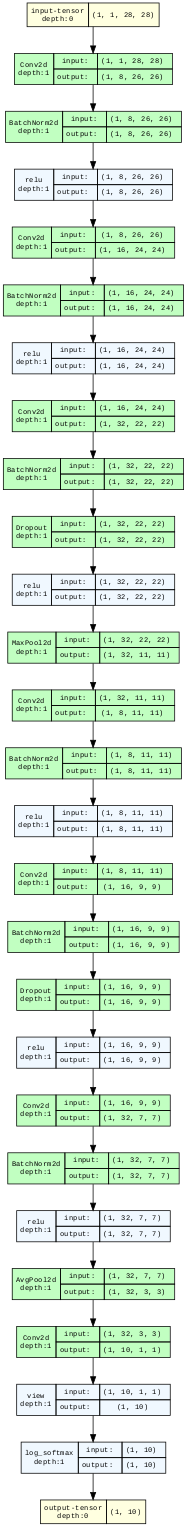

In [7]:
import torchvision
!pip install torchview
from torchview import draw_graph
import graphviz
graphviz.set_jupyter_format('png')
model_graph = draw_graph(Net(), input_size=(1,1,28,28), expand_nested=False)
model_graph.visual_graph